# Find unit operations and manage flowsheets

### Retrieve any Unit, Stream or System object by ID

`find` has access to Flowsheet objects where all BioSTEAM objects are registered. The main flowsheet defaults to the 'Default' flowsheet:

In [1]:
import biosteam as bs
bs.find

<find: mainflowsheet=Default>

Find a Unit object:

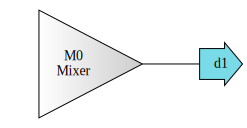

Mixer: M0
ins...
[0] missing stream
[1] missing stream
outs...
[0] d1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [2]:
bs.Stream.species = bs.Species('Water', 'Ethanol')
unit = bs.units.Mixer('M0')
bs.find('M0')

Find a Stream object:

In [3]:
bs.find('d1')

Stream: d1  from  Mixer-M0
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow: 0


All Unit objects can be viewed as a diagram:

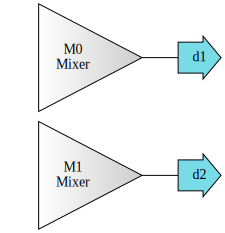

In [4]:
bs.units.Mixer('M1')
bs.find.diagram()

All Stream, Unit, and System objects are stored as Register objects in `find`:

In [5]:
bs.find.stream

Register:
 <Stream: d1>
 <Stream: d2>

In [6]:
bs.find.unit

Register:
 <Mixer: M0>
 <Mixer: M1>

In [7]:
bs.find.system

Register: (Empty)

### Switch between flowsheets

A new Flowsheet objects may be created and set as the main flowsheet:

In [8]:
bs.find.mainflowsheet = bs.Flowsheet('New flowsheet')
bs.find

<find: mainflowsheet=New flowsheet>

Now all new objects will be registered in the new flowsheet:

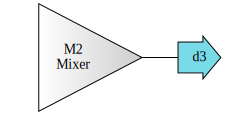

In [9]:
unit = bs.units.Mixer('M2')
bs.find.diagram()

Note that objects in the original flowsheet are not defined anymore and searching them would raise an error:

In [10]:
bs.find('M0')

ValueError: no registered item 'M0'

All Flowsheet objects are added to the `flowsheet` dictionary. Switching between flowsheets is easy:

In [11]:
bs.find.mainflowsheet = bs.find.flowsheet['Default'] # Switch back to default flowsheet
bs.find

<find: mainflowsheet=Default>

As an example, the `lipidcane` biorefinery defines its own flowsheet and leaves it as the main flowsheet when you import it:

In [12]:
import lipidcane # You must pip install lipidcane first
bs.find

<find: mainflowsheet=Lipidcane>

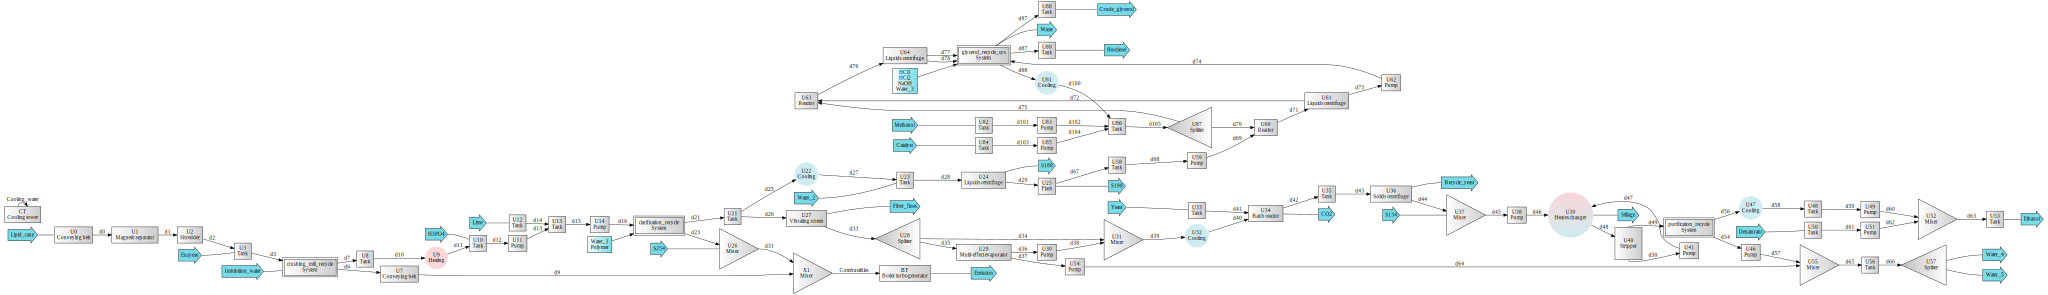

In [13]:
bs.find.diagram()